In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
path='data/household_power_consumption.txt'
df=pd.read_csv(path,sep=';')
df


C:\Users\admin\AppData\Local\Temp\ipykernel_30508\3187435048.py:2: DtypeWarning: Columns (2,3,4,5,6,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(path,sep=';')


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0
...,...,...,...,...,...,...,...,...,...
2075254,26/11/2010,20:58:00,0.946,0.0,240.43,4.0,0.0,0.0,0.0
2075255,26/11/2010,20:59:00,0.944,0.0,240.0,4.0,0.0,0.0,0.0
2075256,26/11/2010,21:00:00,0.938,0.0,239.82,3.8,0.0,0.0,0.0
2075257,26/11/2010,21:01:00,0.934,0.0,239.7,3.8,0.0,0.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [34]:
#Convert to datetime
df['Datetime'] = pd.to_datetime(df['Date'] + ' ' + df['Time'], format='%d/%m/%Y %H:%M:%S', errors='coerce')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 10 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Date                   object        
 1   Time                   object        
 2   Global_active_power    object        
 3   Global_reactive_power  object        
 4   Voltage                object        
 5   Global_intensity       object        
 6   Sub_metering_1         object        
 7   Sub_metering_2         object        
 8   Sub_metering_3         float64       
 9   Datetime               datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 158.3+ MB


In [6]:
df.columns

Index(['Date', 'Time', 'Global_active_power', 'Global_reactive_power',
       'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3', 'Datetime'],
      dtype='object')

In [7]:
df=df.drop(columns=['Date','Time'])

In [8]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0,2006-12-16 17:24:00
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0,2006-12-16 17:25:00
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0,2006-12-16 17:26:00
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0,2006-12-16 17:27:00
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0,2006-12-16 17:28:00


In [10]:
#set datetime index
df.set_index('Datetime', inplace=True)

In [11]:
df.sample()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2007-08-23 01:19:00,0.182,0.110,241.610,0.800,0.000,0.000,0.0


In [17]:
df.loc['2007-01']

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2007-01-01 00:00:00,2.580,0.136,241.970,10.600,0.000,0.000,0.0
2007-01-01 00:01:00,2.552,0.100,241.750,10.400,0.000,0.000,0.0
2007-01-01 00:02:00,2.550,0.100,241.640,10.400,0.000,0.000,0.0
2007-01-01 00:03:00,2.550,0.100,241.710,10.400,0.000,0.000,0.0
2007-01-01 00:04:00,2.554,0.100,241.980,10.400,0.000,0.000,0.0
...,...,...,...,...,...,...,...
2007-01-31 23:55:00,0.334,0.130,243.800,1.400,0.000,0.000,0.0
2007-01-31 23:56:00,0.332,0.126,243.260,1.400,0.000,0.000,0.0
2007-01-31 23:57:00,0.328,0.124,242.590,1.400,0.000,0.000,0.0


In [14]:
# convert to numweic 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    object 
 1   Global_reactive_power  object 
 2   Voltage                object 
 3   Global_intensity       object 
 4   Sub_metering_1         object 
 5   Sub_metering_2         object 
 6   Sub_metering_3         float64
dtypes: float64(1), object(6)
memory usage: 126.7+ MB


In [32]:
cols_to_convert = [
    'Global_active_power',
    'Global_reactive_power',
    'Voltage',
    'Global_intensity',
    'Sub_metering_1',
    'Sub_metering_2'
]


df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')


C:\Users\admin\AppData\Local\Temp\ipykernel_30508\758649299.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [20]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [21]:
df = df.dropna()

In [22]:
df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [24]:
#daily average active power
daily_avg_power = df['Global_active_power'].resample('D').mean()
daily_avg_power

Datetime
2006-12-16    3.053475
2006-12-17    2.354486
2006-12-18    1.530435
2006-12-19    1.157079
2006-12-20    1.545658
                ...   
2010-11-22    1.417733
2010-11-23    1.095511
2010-11-24    1.247394
2010-11-25    0.993864
2010-11-26    1.178230
Freq: D, Name: Global_active_power, Length: 1442, dtype: float64

In [25]:
# weekly otal power
weekly_sum_power = df['Global_active_power'].resample('W').sum()
weekly_sum_power

Datetime
2006-12-17     4599.636
2006-12-24    17477.128
2006-12-31    19736.518
2007-01-07    14961.068
2007-01-14    16176.334
                ...    
2010-10-31     9666.352
2010-11-07    11638.018
2010-11-14    13466.152
2010-11-21    11159.630
2010-11-28     8334.588
Freq: W-SUN, Name: Global_active_power, Length: 207, dtype: float64

In [28]:
# monthly average voltage
monthly_avg_voltage = df['Voltage'].resample('ME').mean()
monthly_avg_voltage

Datetime
2006-12-31    241.441125
2007-01-31    240.905101
2007-02-28    240.519390
2007-03-31    240.513469
2007-04-30    239.400026
2007-05-31    235.178364
2007-06-30    238.875530
2007-07-31    237.671247
2007-08-31    237.937241
2007-09-30    239.424108
2007-10-31    239.725826
2007-11-30    240.869262
2007-12-31    241.725763
2008-01-31    240.646329
2008-02-29    240.602964
2008-03-31    241.325375
2008-04-30    241.221191
2008-05-31    240.367919
2008-06-30    238.975188
2008-07-31    239.770826
2008-08-31    240.433052
2008-09-30    240.124581
2008-10-31    240.329369
2008-11-30    240.586888
2008-12-31    243.083941
2009-01-31    243.793216
2009-02-28    242.399009
2009-03-31    242.303638
2009-04-30    241.633263
2009-05-31    240.118792
2009-06-30    241.042473
2009-07-31    242.017859
2009-08-31    241.269762
2009-09-30    241.146457
2009-10-31    240.894134
2009-11-30    241.946597
2009-12-31    244.082419
2010-01-31    243.455510
2010-02-28    242.348111
2010-03-31    24

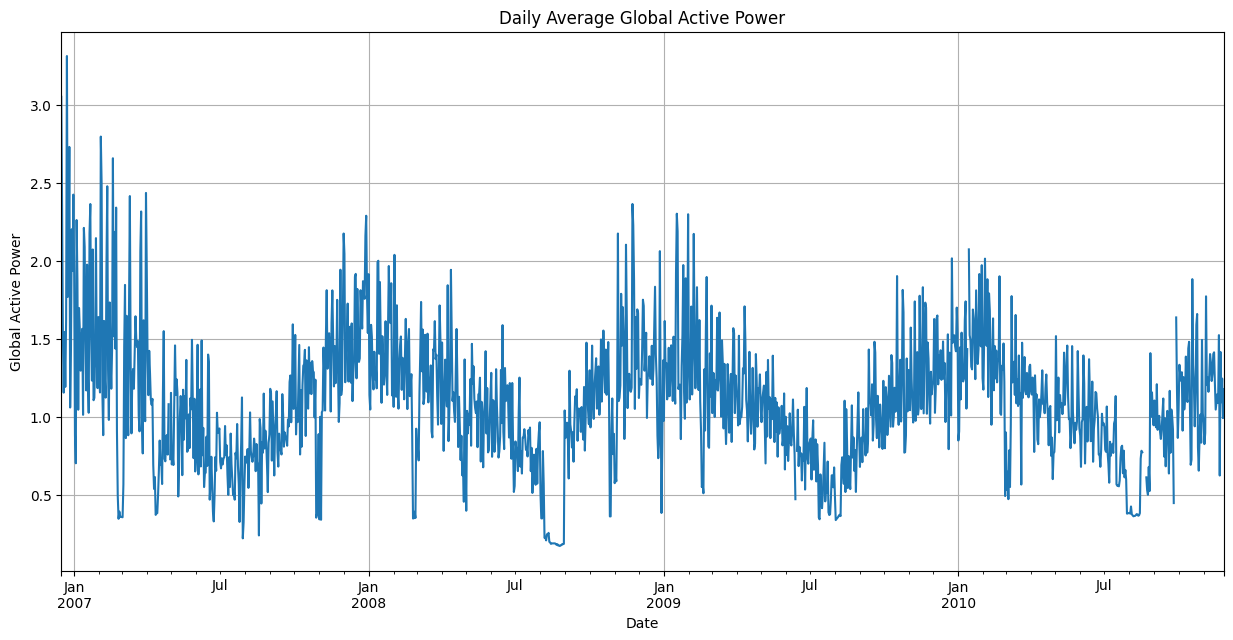

In [35]:
#plot
#Plot daily average power
daily_avg_power.plot(title='Daily Average Global Active Power', figsize=(15, 7))
plt.ylabel('Global Active Power')
plt.xlabel('Date')
plt.grid(True)
plt.show()

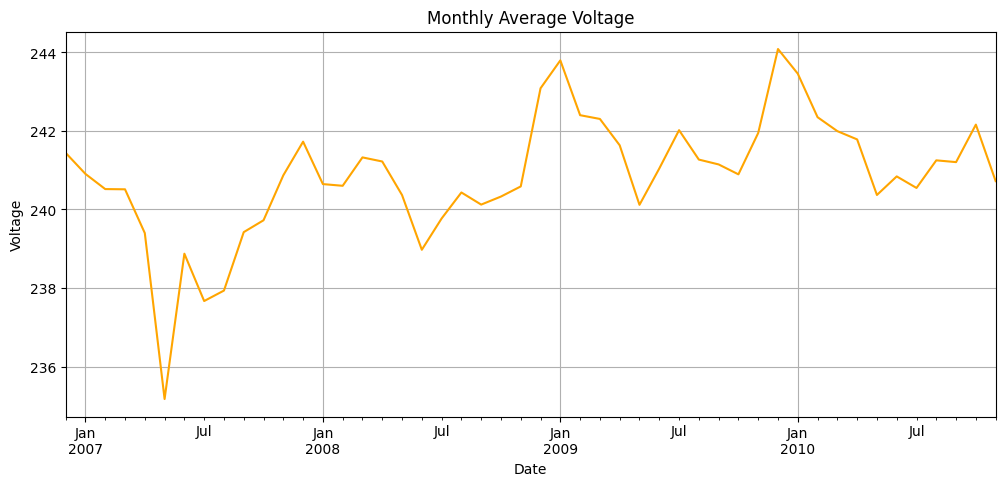

In [31]:
#Plot monthly average voltage
monthly_avg_voltage.plot(title='Monthly Average Voltage', figsize=(12, 5), color='orange')
plt.ylabel('Voltage')
plt.xlabel('Date')
plt.grid(True)
plt.show()